# Modelamiento

In [38]:
import pandas as pd

df = pd.read_pickle("..\data\processed\df_processed")

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def evaluar_modelo_kmeans_varios_k(X):
    """
    Analiza un modelo de k-means con distintos números de clústeres (k).

    Parámetros:
        - X: Datos de entrada.

    Esta función ajusta modelos de k-means con un rango de clústeres (desde 2 hasta 10) a los datos de entrada y realiza las siguientes acciones:
    - Calcula la inercia para cada número de clústeres.
    - Muestra el porcentaje de muestras en cada grupo para cada número de clústeres.
    - Grafica el cambio de la inercia en función del número de clústeres.
    - Muestra una tabla con los valores de inercia y el cambio porcentual de la inercia entre filas.
    """
    n_clusters_range = range(2, 11)
    inercias = []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(X)
        inercias.append(kmeans.inertia_)

        # Obtener las etiquetas de los grupos
        labels = kmeans.labels_

        # Calcular el porcentaje de muestras en cada grupo
        group_percentages = [sum(labels == i) / len(labels) * 100 for i in range(n_clusters)]
        print(f"Porcentaje de muestras en cada grupo para {n_clusters} clústeres:")
        for i, percentage in enumerate(group_percentages):
            print(f"Grupo {i + 1}: {percentage:.2f}%")
        print()  # Salto de línea para separar los resultados de cada número de clústeres

    # Graficar la inercia
    plt.figure(figsize=(10, 5))
    plt.plot(n_clusters_range, inercias, marker='o')
    plt.xlabel('Número de clústeres (k)')
    plt.ylabel('Inercia')
    plt.title('Método del codo para k-means')

    plt.tight_layout()
    plt.show()

    # Calcular el cambio porcentual entre filas de inercia
    inercia_change = [0] + [(inercias[i] - inercias[i-1]) / inercias[i-1] * 100 for i in range(1, len(inercias))]

    # Crear un DataFrame con los valores de inercia y cambio porcentual
    df = pd.DataFrame({
        'Número de clústeres (k)': n_clusters_range,
        'Inercia': inercias,
        'Cambio inercia (%)': inercia_change,
    })

    # Imprimir el DataFrame
    print(df)

## Para la región `Ica`

In [40]:
df_ica = df[df['region']=='Ica']

In [41]:
df_ica.drop('region', axis=1, inplace=True)

C:\Users\ANDREU\AppData\Local\Temp\ipykernel_21244\2005139173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica.drop('region', axis=1, inplace=True)


Porcentaje de muestras en cada grupo para 2 clústeres:
Grupo 1: 55.50%
Grupo 2: 44.50%

Porcentaje de muestras en cada grupo para 3 clústeres:
Grupo 1: 22.60%
Grupo 2: 35.49%
Grupo 3: 41.91%

Porcentaje de muestras en cada grupo para 4 clústeres:
Grupo 1: 34.19%
Grupo 2: 30.82%
Grupo 3: 17.71%
Grupo 4: 17.27%

Porcentaje de muestras en cada grupo para 5 clústeres:
Grupo 1: 12.77%
Grupo 2: 30.64%
Grupo 3: 17.35%
Grupo 4: 13.48%
Grupo 5: 25.77%

Porcentaje de muestras en cada grupo para 6 clústeres:
Grupo 1: 12.62%
Grupo 2: 19.55%
Grupo 3: 17.35%
Grupo 4: 10.65%
Grupo 5: 25.40%
Grupo 6: 14.43%

Porcentaje de muestras en cada grupo para 7 clústeres:
Grupo 1: 12.01%
Grupo 2: 19.55%
Grupo 3: 4.44%
Grupo 4: 10.65%
Grupo 5: 23.50%
Grupo 6: 14.43%
Grupo 7: 15.43%

Porcentaje de muestras en cada grupo para 8 clústeres:
Grupo 1: 10.58%
Grupo 2: 16.24%
Grupo 3: 15.43%
Grupo 4: 9.38%
Grupo 5: 4.41%
Grupo 6: 21.51%
Grupo 7: 14.41%
Grupo 8: 8.05%

Porcentaje de muestras en cada grupo para 9 clústere

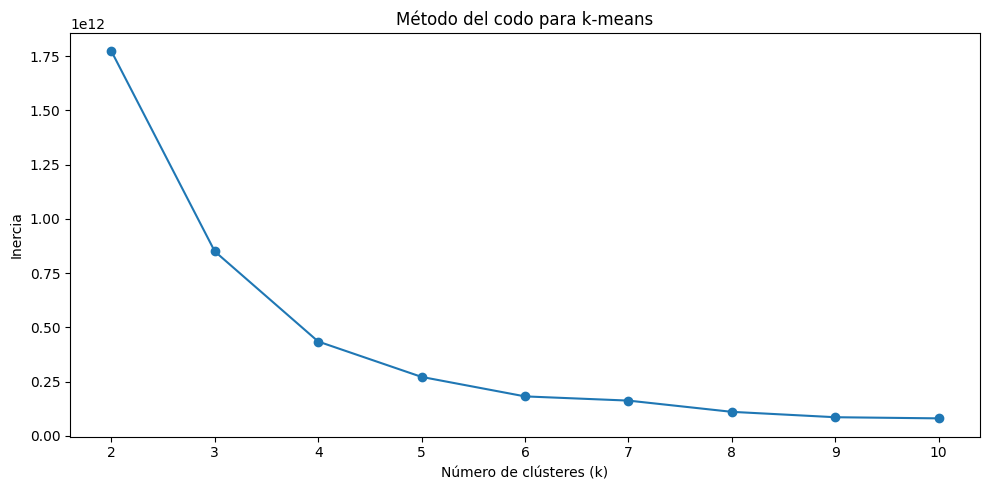

   Número de clústeres (k)       Inercia  Cambio inercia (%)
0                        2  1.773418e+12            0.000000
1                        3  8.499485e+11          -52.072848
2                        4  4.344070e+11          -48.890198
3                        5  2.712133e+11          -37.567000
4                        6  1.813818e+11          -33.122102
5                        7  1.619810e+11          -10.696118
6                        8  1.101346e+11          -32.007700
7                        9  8.530807e+10          -22.541977
8                       10  8.004752e+10           -6.166531


In [32]:
evaluar_modelo_kmeans_varios_k(df_ica)

Para la región Ica, el número óptimo de clúster es 6. Aunque por razones del negocio podrían considerarse 5 clústeres.

### Descripción de los clústeres

In [43]:
from sklearn.cluster import KMeans

# Supongamos que X es tu conjunto de datos
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_ica)

df_ica['Cluster'] = kmeans.labels_

# Calcula las estadísticas descriptivas para cada clúster
cluster_description = df_ica.groupby('Cluster').mean()
print(cluster_description)

         rendimiento  trabajo_horas    jabas_al     jabas_cc   jabas_cp  \
Cluster                                                                   
0          59.039873      35.797385   40.648380    34.880810   4.788257   
1         106.081346     315.515326  488.281801  1075.151456  66.758123   
2          81.533473     241.999574  130.940622   437.232387  31.390068   
3         112.428882     253.012770  489.333104   307.912495  74.908369   
4          75.384797     145.974029  125.985515   216.157267  30.602248   
5          89.600101      62.343085   36.842101    54.024069   0.422686   

           jabas_js    jabas_mg     jabas_rg   jabas_sg  jabas_tc  ...  \
Cluster                                                            ...   
0         16.798381   10.253724    58.706043   6.833256  2.373032  ...   
1        685.054291  114.205556   903.848582   0.000000  4.107778  ...   
2        224.182694   57.071603   112.999071  85.955823  1.501833  ...   
3        301.557289  115.4534

C:\Users\ANDREU\AppData\Local\Temp\ipykernel_21244\2227378458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ica['Cluster'] = kmeans.labels_


## Para la región `Piura`

In [44]:
df_piura = df[df['region']=='Piura']

In [45]:
df_piura.drop('region', axis=1, inplace=True)

C:\Users\ANDREU\AppData\Local\Temp\ipykernel_21244\202142400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piura.drop('region', axis=1, inplace=True)


Porcentaje de muestras en cada grupo para 2 clústeres:
Grupo 1: 66.54%
Grupo 2: 33.46%

Porcentaje de muestras en cada grupo para 3 clústeres:
Grupo 1: 42.78%
Grupo 2: 31.65%
Grupo 3: 25.57%

Porcentaje de muestras en cada grupo para 4 clústeres:
Grupo 1: 38.48%
Grupo 2: 19.21%
Grupo 3: 25.20%
Grupo 4: 17.11%

Porcentaje de muestras en cada grupo para 5 clústeres:
Grupo 1: 31.65%
Grupo 2: 17.56%
Grupo 3: 24.90%
Grupo 4: 14.29%
Grupo 5: 11.60%

Porcentaje de muestras en cada grupo para 6 clústeres:
Grupo 1: 31.62%
Grupo 2: 9.46%
Grupo 3: 24.90%
Grupo 4: 12.26%
Grupo 5: 11.52%
Grupo 6: 10.24%

Porcentaje de muestras en cada grupo para 7 clústeres:
Grupo 1: 24.27%
Grupo 2: 9.47%
Grupo 3: 24.64%
Grupo 4: 12.23%
Grupo 5: 11.12%
Grupo 6: 10.24%
Grupo 7: 8.02%

Porcentaje de muestras en cada grupo para 8 clústeres:
Grupo 1: 31.44%
Grupo 2: 8.01%
Grupo 3: 24.90%
Grupo 4: 7.56%
Grupo 5: 5.43%
Grupo 6: 10.19%
Grupo 7: 7.00%
Grupo 8: 5.47%

Porcentaje de muestras en cada grupo para 9 clústeres:
G

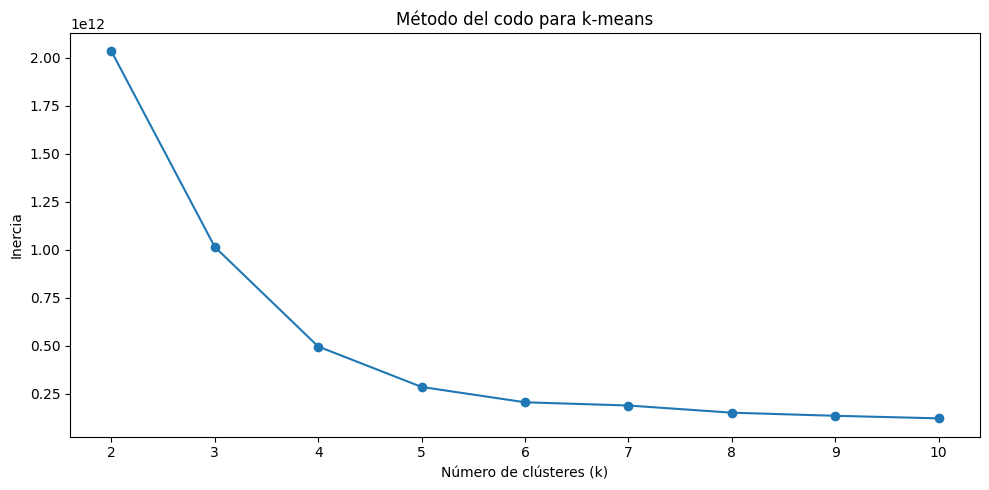

   Número de clústeres (k)       Inercia  Cambio inercia (%)
0                        2  2.034995e+12            0.000000
1                        3  1.014626e+12          -50.141129
2                        4  4.958019e+11          -51.134496
3                        5  2.850115e+11          -42.515051
4                        6  2.050738e+11          -28.047184
5                        7  1.882740e+11           -8.192044
6                        8  1.508832e+11          -19.859804
7                        9  1.346589e+11          -10.752863
8                       10  1.212748e+11           -9.939246


In [35]:
evaluar_modelo_kmeans_varios_k(df_piura)

Para la región Ica, el número óptimo de clúster es 7. Aunque por razones del negocio, podrían considerarse 5 clústeres.

### Descripción de los clústeres

In [47]:
from sklearn.cluster import KMeans

# Supongamos que X es tu conjunto de datos
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(df_piura)

df_piura['Cluster'] = kmeans.labels_

# Calcula las estadísticas descriptivas para cada clúster
cluster_description = df_piura.groupby('Cluster').mean()
print(cluster_description)

         rendimiento  trabajo_horas    jabas_al   jabas_cc  jabas_cp  \
Cluster                                                                
0          72.864813     171.385225  250.081235   0.211519  0.000000   
1          54.605213     258.445444  601.757410   2.370204  0.000000   
2          70.354981     387.441824  668.018302   0.509371  0.000000   
3          58.513049     286.709787  654.939128   2.040717  0.000000   
4         101.950615     320.759598   57.345232  83.593820  0.061777   
5          54.510256      56.991484   61.062747   5.320132  0.000000   

             jabas_js    jabas_mg   jabas_rg    jabas_sg  jabas_tc  ...  \
Cluster                                                             ...   
0         1678.400868  318.073923  51.952621    9.777563  0.000000  ...   
1         4400.370216  350.390576   2.115683    3.725851  0.000000  ...   
2        11721.278994  552.606667   1.336604    1.389182  0.000000  ...   
3         7417.611047  272.932849   2.344516    

C:\Users\ANDREU\AppData\Local\Temp\ipykernel_21244\1798683736.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_piura['Cluster'] = kmeans.labels_
